<a href="https://colab.research.google.com/github/wonkwonlee/likelion-k-digital-training-AI/blob/main/Python-and-Data-Visualization/tensorflow-transfer-learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 전이 학습 Transfer Learning
미리 훈련된 모델을 다른 작업에 사용하기 위해 추가적인 학습을 시키는 것을 의미한다. 

이때 훈련된 모델은 데이터에서 유의 미한 특징(feature)을 뽑아내기 위한 특징 추출기(Feature Extractor)로 쓰이거나, 모델의 일부를 재학습시키기도 한다.

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import PIL.Image as Image 
import matplotlib.pyplot as plt 
import cv2

# 코랩에서 사용하는 런타인 유형 표시
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
tf.keras.utils.get_file('/content/labels.csv', 'http://bit.ly/2GDxsYS')
tf.keras.utils.get_file('/content/sample_submission.csv', 'http://bit.ly/2GGnMNd')
tf.keras.utils.get_file('/content/train.zip', 'http://bit.ly/31nIyel')
tf.keras.utils.get_file('/content/test.zip', 'http://bit.ly/2GHEsnO')

'/content/test.zip'

In [3]:
!unzip train.zip
!unzip test.zip

Archive:  train.zip
replace train/000bec180eb18c7604dcecc8fe0dba07.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  test.zip
replace test/000621fb3cbb32d8935728e48679680e.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
label_text = pd.read_csv('labels.csv')
print(label_text.head())

                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [5]:
label_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


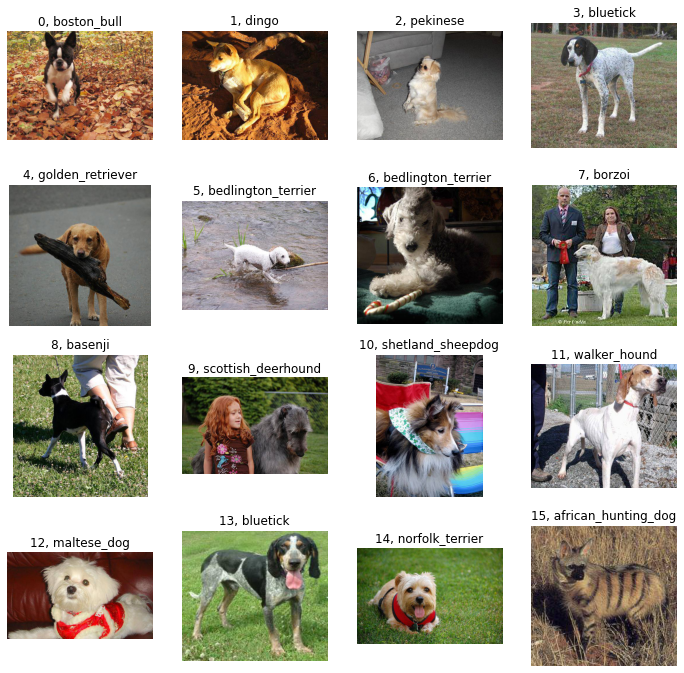

In [6]:
plt.figure(figsize=(12,12))
for i in range(16):
  #loc[i번째 행,'id' 라는 열]
  image_id = label_text.loc[i, 'id']
  plt.subplot(4,4,i+1)
  #절대경로 설정을 활용하여 사진 출력 
  plt.imshow(plt.imread('/content/train/' + image_id + '.jpg')) 
  #사진과 함께 번호(i) + 제목 ( loc[i,'breed'] ) 출력 
  plt.title(str(i) + ', ' + label_text.loc[i, 'breed'])
  # 축 정보 표기 x
  plt.axis('off')
plt.show()

In [7]:
from tensorflow.keras.applications import MobileNetV2 
mobile_v2 = MobileNetV2()

#사전 훈련된 신경망에 layers로 접근하여 마지막 dense 층 제외한 모든 가중치를 선택 
for layer in mobile_v2.layers[:-1]:
  #모든 레이어들을 'trainable(훈련가능)' 여부 True로 전환 
  layer.trainable = True
#마지막 레이어 제외한 모든 레이어에 접근 
for layer in mobile_v2.layers[:-1]:
  #레이어에 커널(가중치)이 존재하는 경우 확인
  if 'kernel' in layer.__dict__:
  #가중치를 획득하여 가중치의 모양(shape)을 kernel_shape에 저장
    kernel_shape = np.array(layer.get_weights()).shape
  #레이어의 가중치를 설정한다. '표준정규분포'. 
    layer.set_weights(tf.random.normal(kernel_shape, 0, 1))

In [ ]:
train_X = [] 
len(label_text) 

for i in range(len(label_text)): 
  img = cv2.imread('/content/train/' + label_text['id'][i] + '.jpg')
  img = cv2.resize(img, dsize=(224, 224)) 
  img = img / 255.0
  
  train_X.append(img)
train_X = np.array(train_X)
print(train_X.shape)
print(train_X.size * train_X.itemsize, ' bytes')
